In [1]:
!pip install -q xlrd

In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [3]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
ds = pd.read_excel("/content/drive/MyDrive/CSUEB/capstone/data/16.xlsx",header=0)

In [9]:
ds = ds[["iyear",	"imonth",	"iday",	"date_num","latlon_val",	"extended",	"hdi2019",	"unemployment_rate",	"country",	"region",	"specificity",	"vicinity",	"crit1",	"crit2",	"crit3",	"doubtterr",	"multiple",	"success",	"suicide",	"targtype1",	"targsubtype1",	"natlty1",	"guncertain1",	"individual",	"claimed",	"weaptype1",	"weapsubtype1",	"nkill",	"nkillter",	"nwound",	"nwoundte",	"property",	"ishostkid",	"INT_LOG",	"INT_IDEO",	"INT_MISC",	"INT_ANY",	"provstate"	,"city",	"corp1",	"target1",	"gname",	"country_type","gdp"]]

ds.head()

,iyear,imonth,iday,date_num,latlon_val,extended,hdi2019,unemployment_rate,country,region,...,INT_IDEO,INT_MISC,INT_ANY,provstate,city,corp1,target1,gname,country_type,gdp
0,1970.0,1.0,0.0,2.0,4607717.0,0.0,0.888,0.56,78.0,8.0,...,-9.0,1.0,1.0,121.0,1417.0,-999.0,32902.0,1854.0,1.0,1.170000e+11
1,1970.0,1.0,1.0,3.0,4804638.0,0.0,0.926,4.80,217.0,1.0,...,0.0,0.0,0.0,1757.0,2136.0,-999.0,5685.0,1876.0,1.0,4.760000e+12
2,1970.0,1.0,2.0,4.0,4599056.0,0.0,0.926,4.80,217.0,1.0,...,-9.0,0.0,-9.0,289.0,12173.0,10344.0,11858.0,1854.0,1.0,4.760000e+12
3,1970.0,1.0,10.0,12.0,5133360.0,0.0,0.947,0.70,75.0,8.0,...,1.0,1.0,1.0,206.0,2557.0,-999.0,17347.0,485.0,1.0,1.540000e+12
4,1970.0,1.0,12.0,14.0,4703968.0,0.0,0.926,4.80,217.0,1.0,...,-9.0,0.0,-9.0,1310.0,13868.0,5172.0,13709.0,1685.0,1.0,4.760000e+12


In [10]:
# With respect to date_num
df_corr = ds.corr(method="pearson")
print(df_corr.shape)
print("correlation with date_num:")
df_corrP = pd.DataFrame(df_corr["date_num"].sort_values(ascending=False))
df_corrP

(44, 44)
correlation with date_num:


,date_num
date_num,1.000000
iyear,0.999765
claimed,0.892402
nkillter,0.853546
nwoundte,0.845275
corp1,0.514384
country_type,0.449788
region,0.396160
unemployment_rate,0.333667
doubtterr,0.283376


In [12]:
# highest absolute correlations with price
pd.options.display.float_format = '{:,.2f}'.format
df_corrH = df_corrP[df_corrP["date_num"] > 0.3]
df_corrH

,date_num
date_num,1.00
iyear,1.00
claimed,0.89
nkillter,0.85
nwoundte,0.85
corp1,0.51
country_type,0.45
region,0.40
unemployment_rate,0.33


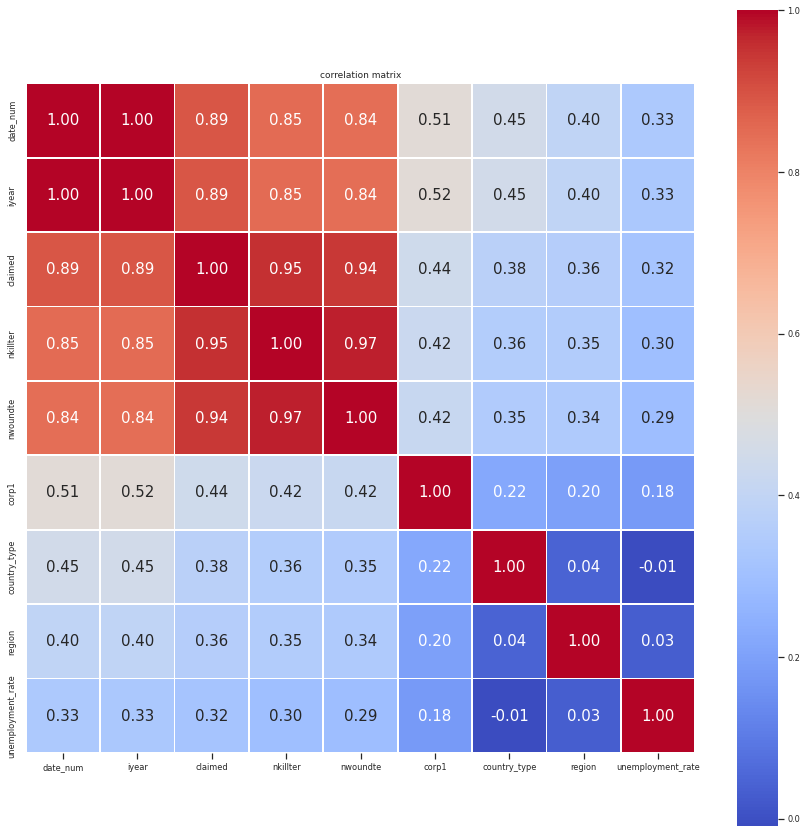

In [14]:
df3 = ds[df_corrH.index]

idx = df3.corr().index
df3_sorted = df3.loc[:, idx]  # sort dataframe columns by their correlation with Appliances

plt.figure(figsize = (15,15))
sns.set(font_scale=0.75)
ax = sns.heatmap(df3_sorted.corr().round(3), 
            annot=True, 
            square=True, 
            linewidths=.75, cmap="coolwarm", 
            fmt = ".2f", 
            annot_kws = {"size": 15})
ax.xaxis.tick_bottom()
plt.title("correlation matrix")
plt.show()

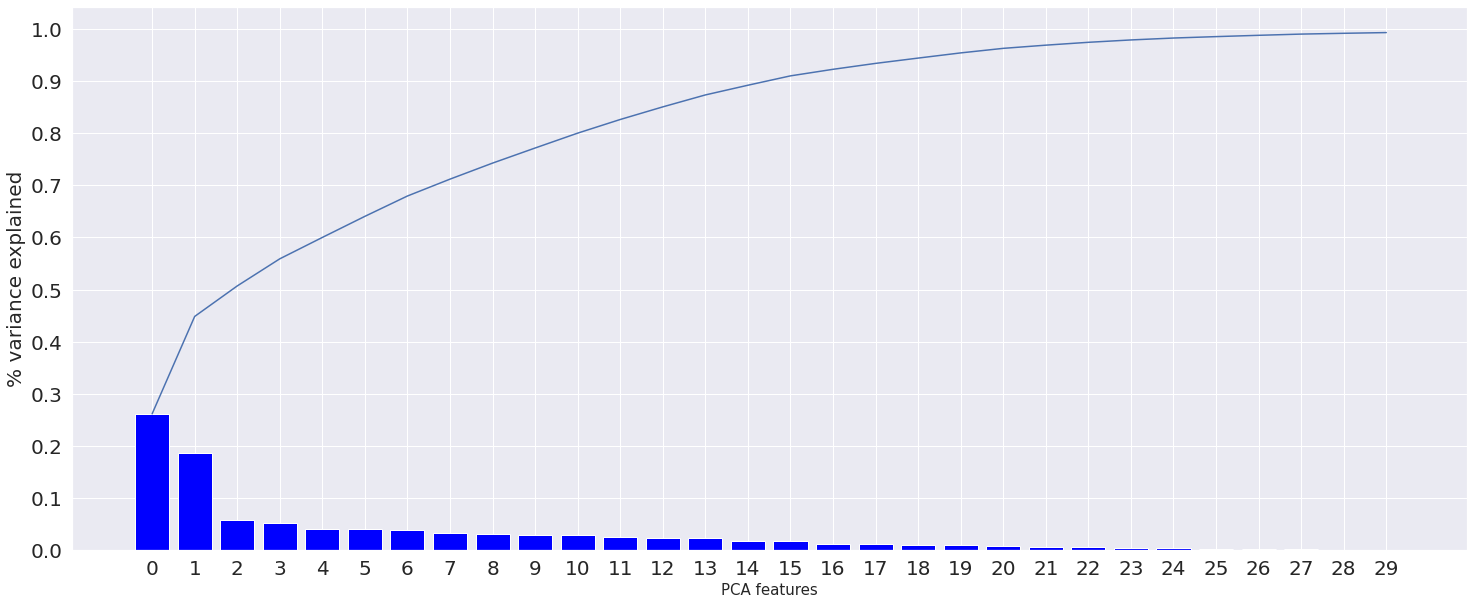

In [15]:
df_feat = ds.loc[:, ds.columns != "date_num"]
# print(df_feat.info())
df_feat = MinMaxScaler(feature_range=(-1,1)).fit_transform(df_feat)

# principal components among features
pca = PCA(n_components=30)
res_pca = pca.fit_transform(df_feat)

# scree plot
features = range(pca.n_components_)
plt.figure(figsize = (25,10))
plt.bar(features, pca.explained_variance_ratio_, color="blue")
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("PCA features", fontsize=15)
plt.ylabel("% variance explained", fontsize=20)
plt.xticks(features, fontsize=20)
plt.yticks(ticks=np.arange(0.0, 1.0001, 0.1), fontsize=20);

In [16]:
df_pca = pd.DataFrame(res_pca)
df_pca = df_pca.add_prefix("pca")

df3 = ds.copy()
col = df3.pop("date_num")
df3.insert(0, col.name, col)     # move price column to the left

# drop the feature columns which the components summarize
df3.reset_index(inplace=True)
df3 = pd.concat([df3, df_pca], axis=1)
for col in df3.columns:
    if col != "date_num" and "pca" not in col:
        del df3[col]
df3.set_index("date_num", inplace=True)
df3.columns

Index(['pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8',
       'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca14', 'pca15', 'pca16',
       'pca17', 'pca18', 'pca19', 'pca20', 'pca21', 'pca22', 'pca23', 'pca24',
       'pca25', 'pca26', 'pca27', 'pca28', 'pca29'],
      dtype='object')

In [18]:
f_corr = df3.corr(method="pearson")
print("principal components with at least modest correlation to date_num:")
df_corrP = pd.DataFrame(df_corr["date_num"].sort_values(ascending=False))

# absolute correlations with price > 10%
pd.options.display.float_format = '{:,.2f}'.format
df_corrH = df_corrP[df_corrP["date_num"] > 0.3]
df_corrH

principal components with at least modest correlation to date_num:


,date_num
date_num,1.00
iyear,1.00
claimed,0.89
nkillter,0.85
nwoundte,0.85
corp1,0.51
country_type,0.45
region,0.40
unemployment_rate,0.33


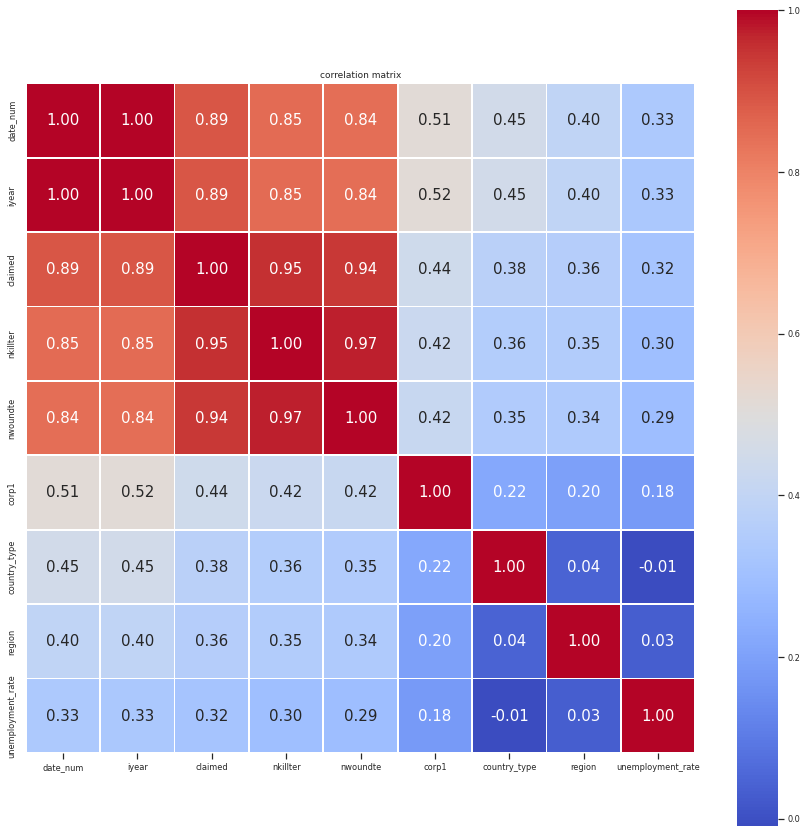

In [20]:
df3 = ds[df_corrH.index]

idx = df3.corr().index
df3_sorted = df3.loc[:, idx]  # sort dataframe columns by their correlation with Appliances

plt.figure(figsize = (15,15))
sns.set(font_scale=0.75)
ax = sns.heatmap(df3_sorted.corr().round(3), 
            annot=True, 
            square=True, 
            linewidths=.95, cmap="coolwarm", 
            fmt = ".2f", 
            annot_kws = {"size": 15})
ax.xaxis.tick_bottom()
plt.title("correlation matrix")
plt.show()

In [22]:
# With respect to longitude
df_corr = ds.corr(method="pearson")
print(df_corr.shape)
print("correlation with x:")
df_corrP = pd.DataFrame(df_corr["latlon_val"].sort_values(ascending=False))
df_corrP

(44, 44)
correlation with x:


,latlon_val
latlon_val,1.00
region,0.34
claimed,0.30
nkillter,0.29
nwoundte,0.29
iyear,0.24
date_num,0.24
gdp,0.18
country,0.14
corp1,0.13


In [24]:
# highest absolute correlations with longitude
pd.options.display.float_format = '{:,.2f}'.format
df_corrH = df_corrP[df_corrP["latlon_val"] > 0.1]
df_corrH

,latlon_val
latlon_val,1.00
region,0.34
claimed,0.30
nkillter,0.29
nwoundte,0.29
iyear,0.24
date_num,0.24
gdp,0.18
country,0.14
corp1,0.13


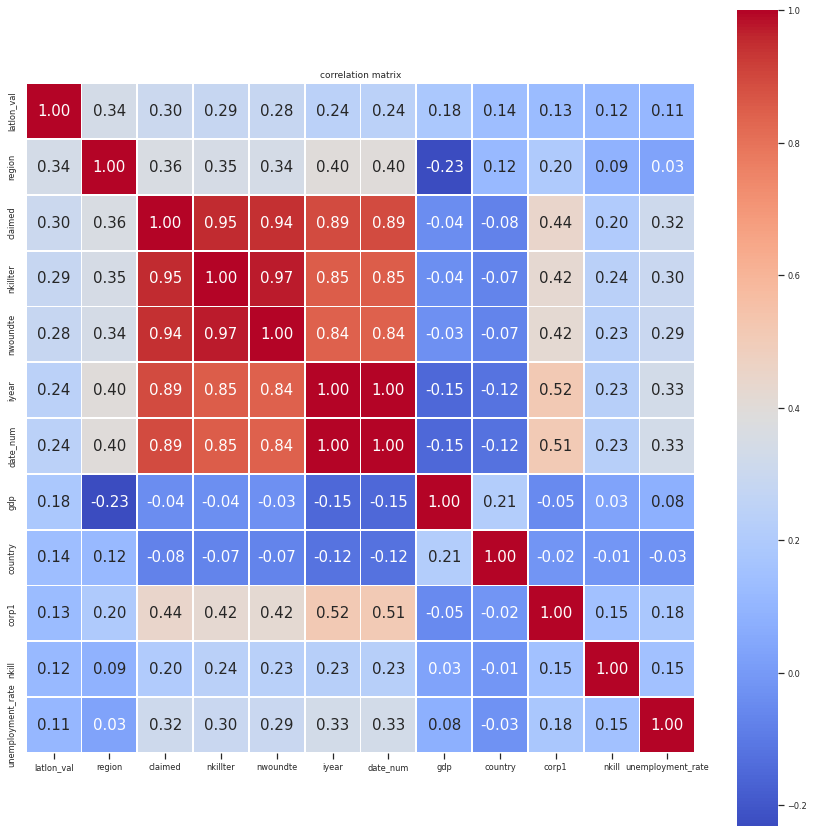

In [29]:
df3 = ds[df_corrH.index]

idx = df3.corr().index
df3_sorted = df3.loc[:, idx]  # sort dataframe columns by their correlation with Appliances

plt.figure(figsize = (15,15))
sns.set(font_scale=0.75)
ax = sns.heatmap(df3_sorted.corr().round(3), 
            annot=True, 
            square=True, 
            linewidths=.75, cmap="coolwarm", 
            fmt = ".2f", 
            annot_kws = {"size": 15})
ax.xaxis.tick_bottom()
plt.title("correlation matrix")
plt.show()

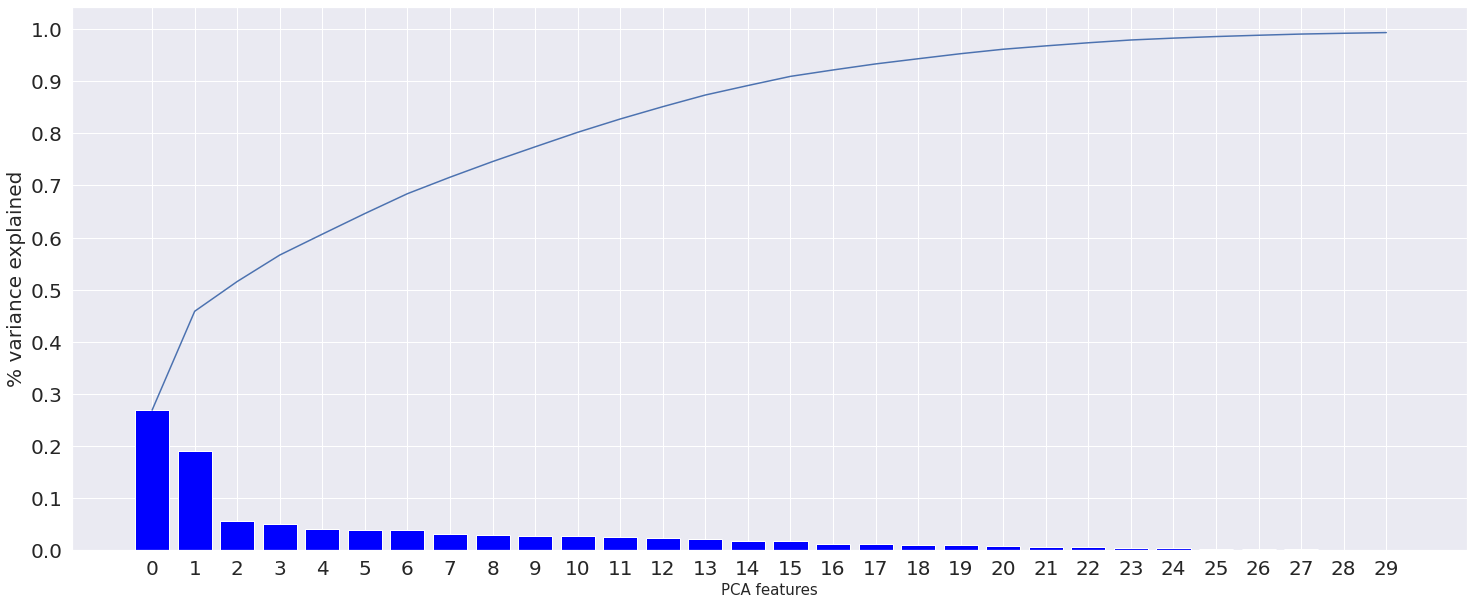

In [25]:
df_feat = ds.loc[:, ds.columns != "x"]
# print(df_feat.info())
df_feat = MinMaxScaler().fit_transform(df_feat)

# principal components among features
pca = PCA(n_components=30)
res_pca = pca.fit_transform(df_feat)

# scree plot
features = range(pca.n_components_)
plt.figure(figsize = (25,10))
plt.bar(features, pca.explained_variance_ratio_, color="blue")
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("PCA features", fontsize=15)
plt.ylabel("% variance explained", fontsize=20)
plt.xticks(features, fontsize=20)
plt.yticks(ticks=np.arange(0.0, 1.0001, 0.1), fontsize=20);

In [26]:
df_pca = pd.DataFrame(res_pca)
df_pca = df_pca.add_prefix("pca")

df3 = ds.copy()
col = df3.pop("latlon_val")
df3.insert(0, col.name, col)     # move price column to the left

# drop the feature columns which the components summarize
df3.reset_index(inplace=True)
df3 = pd.concat([df3, df_pca], axis=1)
for col in df3.columns:
    if col != "latlon_val" and "pca" not in col:
        del df3[col]
# df3.set_index("date_num", inplace=True)
df3.columns

Index(['latlon_val', 'pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6',
       'pca7', 'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca14',
       'pca15', 'pca16', 'pca17', 'pca18', 'pca19', 'pca20', 'pca21', 'pca22',
       'pca23', 'pca24', 'pca25', 'pca26', 'pca27', 'pca28', 'pca29'],
      dtype='object')

In [28]:
f_corr = df3.corr(method="pearson")
print("principal components with at least modest correlation to price:")
df_corrP = pd.DataFrame(df_corr["latlon_val"].sort_values(ascending=False))

# absolute correlations with price > 10%
pd.options.display.float_format = '{:,.2f}'.format
df_corrH = df_corrP[df_corrP["latlon_val"] > 0.1]
df_corrH

principal components with at least modest correlation to price:


,latlon_val
latlon_val,1.00
region,0.34
claimed,0.30
nkillter,0.29
nwoundte,0.29
iyear,0.24
date_num,0.24
gdp,0.18
country,0.14
corp1,0.13
